# Задание №1
Далее в ячейках markdown встречаются цитаты. Это прямые цитаты из задания, опубликованного в нашей гугл-группе.

# 0

Скачиваем указанный датасет **train.csv** к задаче **Titanic**.  
Импорт нужных модулей:

In [4]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1
>загрузить датасет

In [5]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2
>удалить колонки 'Ticket','Cabin' в которых содержится очень много "пустых" (n/a) значений

Посмотрим на количество NaN'ов в этих колонках:

In [6]:
print("NaNs in the \"Cabin\"  column:", df['Cabin' ].isnull().sum())
print("NaNs in the \"Ticket\" column:", df['Ticket'].isnull().sum())

NaNs in the "Cabin"  column: 687
NaNs in the "Ticket" column: 0


Видно, что в проблема с NaN'ами есть только в колонке "Cabin". Однако, в силу очевидной бесполезности колонки "Ticket", удаляем в соответствии с заданием обе колонки:

In [7]:
df.drop(['Ticket', 'Cabin'], axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# 3
>удалить строки в которых все еще есть n/a

In [8]:
print("Number of rows before dropna:", df.shape[0])
df.dropna(inplace = True)
print("Number of rows after  dropna:", df.shape[0])

Number of rows before dropna: 891
Number of rows after  dropna: 712


# 4
>добавить колонку SexId = 0 if Sex == "male" else 1  
>добавить аналогичную колонку EmbarkedId

В случае пола имеем два возможных значения, поэтому SexId строим весьма быстро.  
В случае EmbarkedId их может быть больше (как ниже выясняется, встречаются три разных значения).

In [16]:
print("Number of unique values in the 'Sex' column:", len(df['Sex'].unique()))
df["SexId"] = (df["Sex"] == "male").astype(int)

print("Number of unique values in the 'Embarked' column:", len(df['Embarked'].unique()))
df["EmbarkedId"] = df['Embarked'].rank(method='dense') - 1

df.head()

Number of unique values in the 'Sex' column: 2
Number of unique values in the 'Embarked' column: 3


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,SexId,EmbarkedId
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,2.0


# 5
>построить гистограммы колонок (т.н. "features") Pclass,SexId,Age,SibSp,Parch,EmbarkedId

Не знаю, предполагались ли в задании эксперименты с параметрами графиков. Что-то для более наглядного представления я сделал.
:)

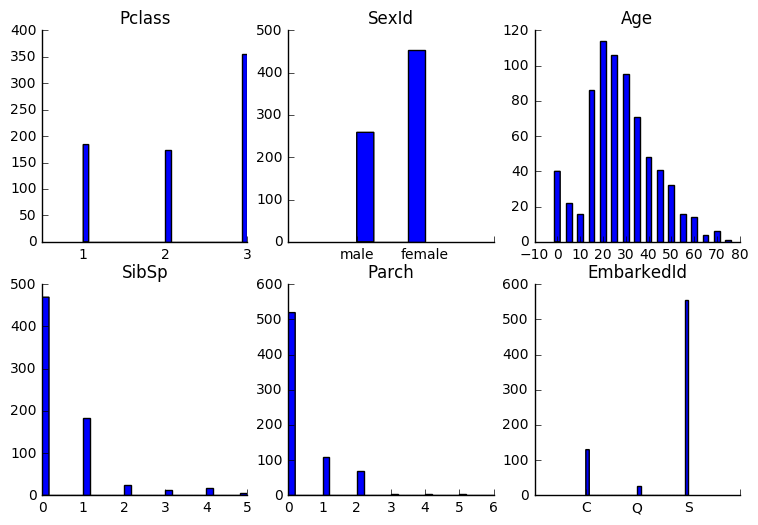

In [17]:
def titanic_hist(df, title = ''):
    fig, axes = plt.subplots(2, 3, figsize = (9,6))

    for ax in axes.ravel():
        ax.spines["right"].set_color("none")
        ax.spines["top"].set_color("none")
        ax.yaxis.tick_left()
        ax.xaxis.tick_bottom()

    axes[0,0].hist(df["Pclass"], bins = 30)
    axes[0,0].set_xticks([1,2,3])
    axes[0,0].set_title("Pclass")

    axes[0,1].hist(df["SexId"], bins = 4)
    axes[0,1].set_xticks([-1,0,1,2])
    axes[0,1].set_xticklabels(['', 'male', 'female', ''])
    axes[0,1].set_title("SexId")

    axes[0,2].hist(df["Age"], bins = range(0,int(df["Age"].max() + 5),5), rwidth = 0.5, align = 'left')
    axes[0,2].set_title("Age")

    axes[1,0].hist(df["SibSp"], bins = 30)
    axes[1,0].set_title("SibSp")

    axes[1,1].hist(df["Parch"], bins = 30)
    axes[1,1].set_title("Parch")

    axes[1,2].hist(df["EmbarkedId"], bins = 30)
    axes[1,2].set_xticks([-1, 0, 1, 2, 3])
    axes[1,2].set_xticklabels(['', 'C', 'Q', 'S', ''])
    axes[1,2].set_title("EmbarkedId")
    
    fig.suptitle(title, fontsize = 15, color = 'm')
    plt.show()
    
titanic_hist(df)

# 6
>построить отдельные гистограммы для подвыборок Survived==1 и Survived==0. какие из фич выглядят наименее похоже?

Повторим построение гистограмм для обоих случаев. Потом сделаем сравнение.

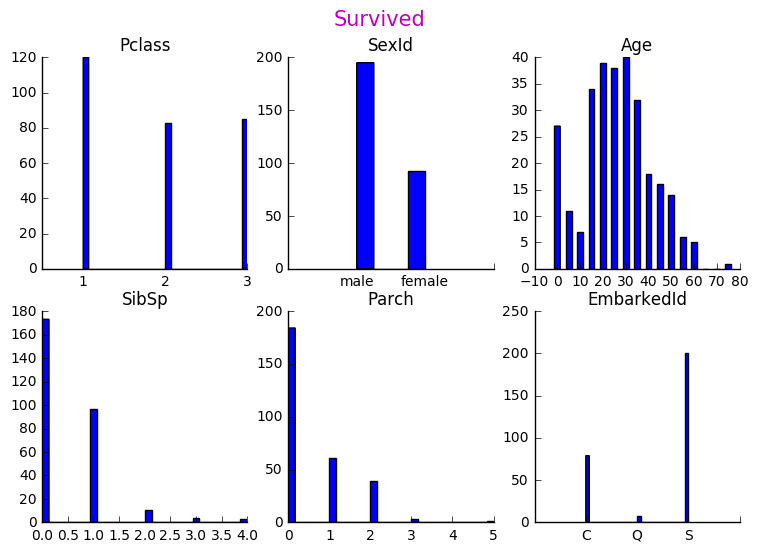

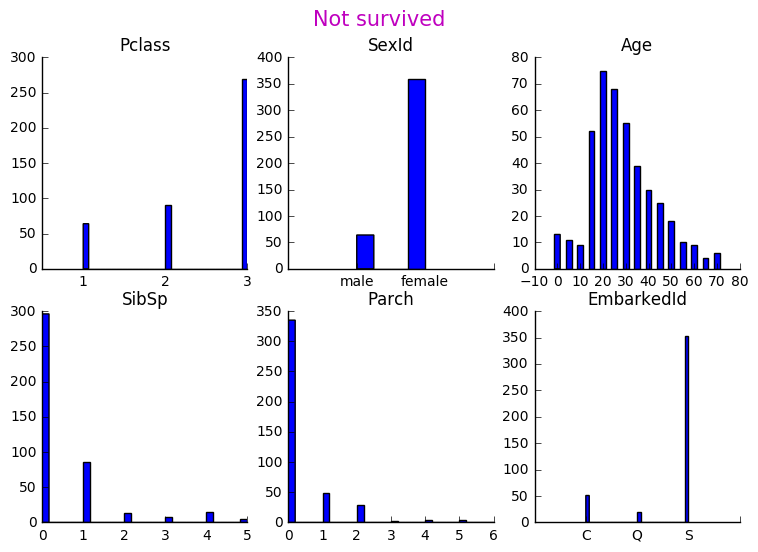

In [18]:
titanic_hist(df[df["Survived"] == 1], 'Survived')
titanic_hist(df[df["Survived"] == 0], 'Not survived')

Можно наблюдать сильное различие в следующих фичах:  
1. Pclass: выживших пассажиров 1-го класса в два раза больше, чем погибших. Выживших пассажиров 3-го класса гораздо меньше, чем погибших.
2. SexId: самое явное различие именно тут. Из мужчин выжили почти все, из женщин меньше выживших менее 25%.
Остальные фичи если и различаются в абсолютных значениях, то в относительном смысле картины для выживших и погибших весьма схожи.

# 7
>построить scatter plots для для пар фич (Age, Pclass), (SexId, Pclass), (EmbarkedId, Age), (EmbarkedId,SexId), (EmbarkedId,Pclass) для всей выборки и по-отдельности для Survived==1 и Survived==0

Видимо, смысл этого задания - попрактиковаться, потому что ценность подобных графиков мне видится сомнительной. Во всяком случае, попытка настроить прозрачность одной точки в надежде на то, что pyplot умеет складывать прозрачности точек, имеющих одну коорднинату, не увенчалась успехом. А тогда непонятно, как можно использовать полученные ниже результаты.

In [19]:
def titanic_scatter(df, f1, f2): #fi == featurei
    fig, axes = plt.subplots(1, 3, figsize = (9,3))
        
    axes[0].scatter(df[f1], df[f2], s = 200)
    axes[0].set_title("All")

    axes[1].scatter(df[df["Survived"] == 1][f1], df[df["Survived"] == 1][f2], s = 200)
    axes[1].set_title("Survived")
    
    axes[2].scatter(df[df["Survived"] == 0][f1], df[df["Survived"] == 0][f2], s = 200)
    axes[2].set_title("Not survived")
    
    fig.text(0.45, 1.0, f1 + '&' + f2, fontsize = 15, color = 'm')
    plt.show()

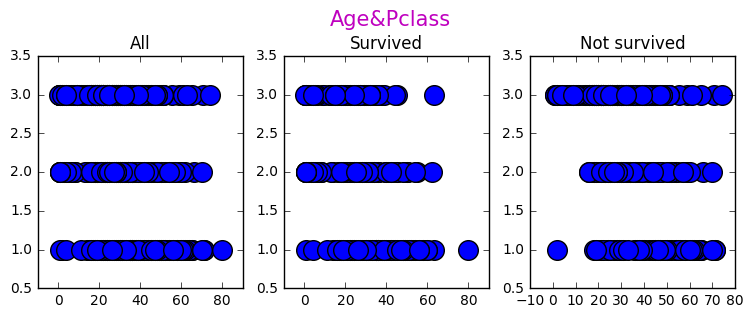

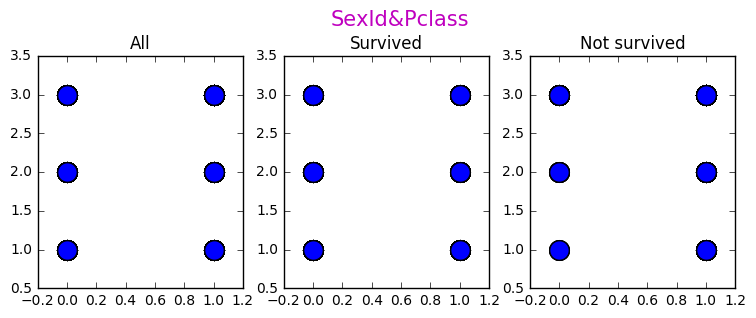

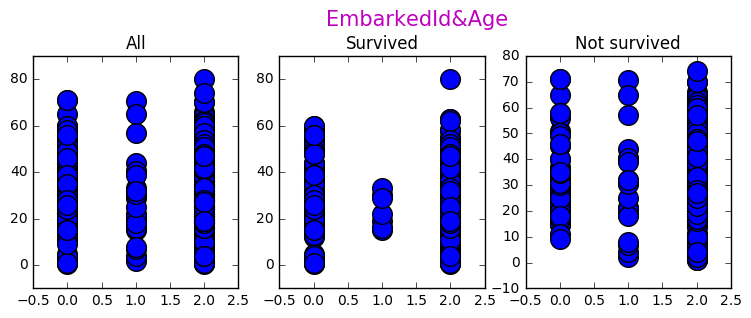

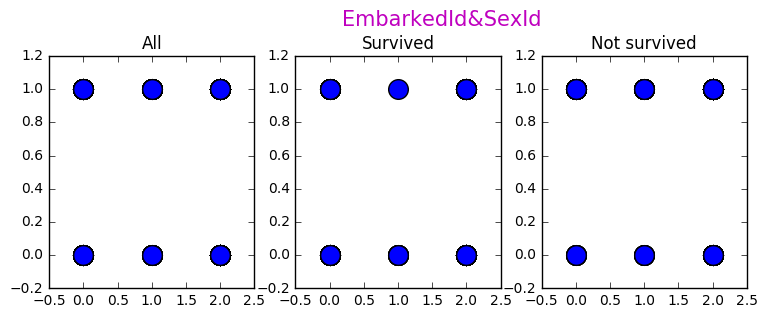

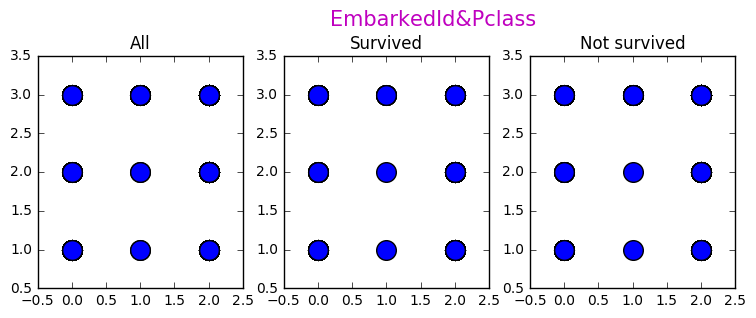

In [20]:
titanic_scatter(df, "Age",        "Pclass")
titanic_scatter(df, "SexId",      "Pclass")
titanic_scatter(df, "EmbarkedId", "Age")
titanic_scatter(df, "EmbarkedId", "SexId")
titanic_scatter(df, "EmbarkedId", "Pclass")